In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.animation as animation
pd.set_option('display.max_columns',50)

In [2]:
games = pd.read_csv('data/games.csv')
players = pd.read_csv('data/players.csv')
plays = pd.read_csv('data/plays.csv')
week1 = pd.read_csv('data/week1.csv')

In [3]:
games.columns

Index(['gameId', 'gameDate', 'gameTimeEastern', 'homeTeamAbbr',
       'visitorTeamAbbr', 'week'],
      dtype='object')

In [4]:
games.head(3)

,gameId,gameDate,gameTimeEastern,homeTeamAbbr,visitorTeamAbbr,week
0,2018090600,09/06/2018,20:20:00,PHI,ATL,1
1,2018090901,09/09/2018,13:00:00,CLE,PIT,1
2,2018090902,09/09/2018,13:00:00,IND,CIN,1


In [5]:
players.columns

Index(['nflId', 'height', 'weight', 'birthDate', 'collegeName', 'position',
       'displayName'],
      dtype='object')

In [6]:
players.head(3)

,nflId,height,weight,birthDate,collegeName,position,displayName
0,2539334,72,190,1990-09-10,Washington,CB,Desmond Trufant
1,2539653,70,186,1988-11-01,Southeastern Louisiana,CB,Robert Alford
2,2543850,69,186,1991-12-18,Purdue,SS,Ricardo Allen


In [7]:
players[players['height']=='6-2'].head(2)

,nflId,height,weight,birthDate,collegeName,position,displayName
194,2555320,6-2,242,07/08/1993,UCLA,OLB,Aaron Wallace
210,2539309,6-2,215,01/26/1991,USC,SS,T.J. McDonald


In [8]:
players['height'].value_counts()

73      159
72      153
74      141
75      136
71      127
76       90
70       81
77       67
6-2      42
78       37
69       37
6-0      33
5-10     32
6-1      29
5-11     27
6-4      25
6-3      25
68       18
6-5      11
79        9
5-9       9
67        3
80        3
6-6       2
6-7       2
66        2
5-7       1
5-8       1
5-6       1
Name: height, dtype: int64

In [9]:
players['height'] = players['height'].apply(lambda row: ((float(row.split('-')[0])*30.48)+(float(row.split('-')[1])*2.54)) if '-' in row else float(row)*2.54)

In [10]:
players.head(3)

,nflId,height,weight,birthDate,collegeName,position,displayName
0,2539334,182.88,190,1990-09-10,Washington,CB,Desmond Trufant
1,2539653,177.80,186,1988-11-01,Southeastern Louisiana,CB,Robert Alford
2,2543850,175.26,186,1991-12-18,Purdue,SS,Ricardo Allen


In [11]:
plays.columns

Index(['gameId', 'playId', 'playDescription', 'quarter', 'down', 'yardsToGo',
       'possessionTeam', 'playType', 'yardlineSide', 'yardlineNumber',
       'offenseFormation', 'personnelO', 'defendersInTheBox',
       'numberOfPassRushers', 'personnelD', 'typeDropback',
       'preSnapVisitorScore', 'preSnapHomeScore', 'gameClock',
       'absoluteYardlineNumber', 'penaltyCodes', 'penaltyJerseyNumbers',
       'passResult', 'offensePlayResult', 'playResult', 'epa',
       'isDefensivePI'],
      dtype='object')

In [12]:
plays.head(5)

,gameId,playId,playDescription,quarter,down,yardsToGo,possessionTeam,playType,yardlineSide,yardlineNumber,offenseFormation,personnelO,defendersInTheBox,numberOfPassRushers,personnelD,typeDropback,preSnapVisitorScore,preSnapHomeScore,gameClock,absoluteYardlineNumber,penaltyCodes,penaltyJerseyNumbers,passResult,offensePlayResult,playResult,epa,isDefensivePI
0,2018090600,75,(15:00) M.Ryan pass short right to J.Jones pus...,1,1,15,ATL,play_type_pass,ATL,20,I_FORM,"2 RB, 1 TE, 2 WR",7.0,4.0,"4 DL, 2 LB, 5 DB",TRADITIONAL,0.0,0.0,15:00:00,90.0,NaN,NaN,C,10,10,0.261827,False
1,2018090600,146,(13:10) M.Ryan pass incomplete short right to ...,1,1,10,ATL,play_type_pass,PHI,39,SINGLEBACK,"1 RB, 1 TE, 3 WR",7.0,4.0,"4 DL, 2 LB, 5 DB",TRADITIONAL,0.0,0.0,13:10:00,49.0,NaN,NaN,I,0,0,-0.372360,False
2,2018090600,168,(13:05) (Shotgun) M.Ryan pass incomplete short...,1,2,10,ATL,play_type_pass,PHI,39,SHOTGUN,"2 RB, 1 TE, 2 WR",6.0,4.0,"4 DL, 2 LB, 5 DB",TRADITIONAL,0.0,0.0,13:05:00,49.0,NaN,NaN,I,0,0,-0.702779,False
3,2018090600,190,(13:01) (Shotgun) M.Ryan pass deep left to J.J...,1,3,10,ATL,play_type_pass,PHI,39,SHOTGUN,"1 RB, 1 TE, 3 WR",6.0,5.0,"4 DL, 1 LB, 6 DB",SCRAMBLE_ROLLOUT_LEFT,0.0,0.0,13:01:00,49.0,NaN,NaN,C,33,33,3.047530,False
4,2018090600,256,(10:59) (Shotgun) M.Ryan pass incomplete short...,1,3,1,ATL,play_type_pass,PHI,1,SHOTGUN,"2 RB, 3 TE, 0 WR",8.0,6.0,"6 DL, 3 LB, 2 DB",TRADITIONAL,0.0,0.0,10:59:00,11.0,NaN,NaN,I,0,0,-0.842272,False


In [13]:
game1 = plays[plays['gameId']==2018090600].reset_index(drop=True)
plays1 = [game1['playId'][i] for i in range(len(game1))]
print(plays1)

[75, 146, 168, 190, 256, 320, 344, 402, 492, 521, 545, 636, 752, 776, 839, 889, 949, 992, 1037, 1061, 1085, 1202, 1295, 1344, 1423, 1473, 1546, 1568, 1628, 1680, 1750, 1779, 1801, 1869, 1894, 1916, 1940, 2055, 2094, 2116, 2260, 2360, 2382, 2450, 2474, 2503, 2575, 2624, 2648, 2693, 2736, 2764, 2811, 2980, 3004, 3066, 3095, 3181, 3203, 3257, 3279, 3392, 3481, 3507, 3678, 3791, 3815, 3844, 3904, 3928, 3950, 3979, 4142, 4166, 4207, 4239, 4258, 4282, 4306, 4325, 4366, 4395, 4417, 4472, 1226, 1715, 2305, 3626, 4439]


In [14]:
game1['playDescription'][0]

'(15:00) M.Ryan pass short right to J.Jones pushed ob at ATL 30 for 10 yards (M.Jenkins).'

In [15]:
week1.columns

Index(['time', 'x', 'y', 's', 'a', 'dis', 'o', 'dir', 'event', 'nflId',
       'displayName', 'jerseyNumber', 'position', 'frameId', 'team', 'gameId',
       'playId', 'playDirection', 'route'],
      dtype='object')

In [16]:
week1['time'] = week1['time'].apply(lambda row: row.split('T')[1])

In [17]:
week1.head(3)

,time,x,y,s,a,dis,o,dir,event,nflId,displayName,jerseyNumber,position,frameId,team,gameId,playId,playDirection,route
0,01:07:14.599Z,91.73,26.67,0.00,0.01,0.02,289.57,240.93,None,310.0,Matt Ryan,2.0,QB,1,away,2018090600,75,left,NaN
1,01:07:14.599Z,88.89,36.47,0.01,0.01,0.01,105.63,66.66,None,79848.0,Malcolm Jenkins,27.0,SS,1,home,2018090600,75,left,NaN
2,01:07:14.599Z,91.35,44.16,0.02,0.03,0.01,290.45,16.86,None,2495454.0,Julio Jones,11.0,WR,1,away,2018090600,75,left,HITCH


In [18]:
week1['event'].value_counts()

None                         908315
ball_snap                     15236
pass_forward                  14166
pass_arrived                  11456
pass_outcome_caught            8179
first_contact                  6866
tackle                         6792
pass_outcome_incomplete        5305
play_action                    2586
out_of_bounds                  1728
line_set                       1489
qb_sack                         788
man_in_motion                   547
pass_outcome_interception       485
touchdown                       366
pass_tipped                     280
fumble                          236
pass_outcome_touchdown          214
qb_strip_sack                   178
fumble_defense_recovered        176
fumble_offense_recovered        149
shift                           132
handoff                         101
penalty_flag                     61
pass_shovel                      60
run                              42
touchback                        30
qb_spike                    

In [19]:
week1[week1['playId']==75]

,time,x,y,s,a,dis,o,dir,event,nflId,displayName,jerseyNumber,position,frameId,team,gameId,playId,playDirection,route
0,01:07:14.599Z,91.73,26.67,0.00,0.01,0.02,289.57,240.93,None,310.0,Matt Ryan,2.0,QB,1,away,2018090600,75,left,NaN
1,01:07:14.599Z,88.89,36.47,0.01,0.01,0.01,105.63,66.66,None,79848.0,Malcolm Jenkins,27.0,SS,1,home,2018090600,75,left,NaN
2,01:07:14.599Z,91.35,44.16,0.02,0.03,0.01,290.45,16.86,None,2495454.0,Julio Jones,11.0,WR,1,away,2018090600,75,left,HITCH
3,01:07:14.599Z,86.31,22.01,0.09,0.42,0.01,70.12,168.91,None,2495613.0,Corey Graham,24.0,FS,1,home,2018090600,75,left,NaN
4,01:07:14.599Z,90.78,36.15,0.00,0.00,0.00,257.61,193.97,None,2533040.0,Mohamed Sanu,12.0,WR,1,away,2018090600,75,left,HITCH
5,01:07:14.599Z,73.64,28.70,0.03,0.02,0.01,103.05,219.41,None,2534832.0,Rodney McLeod,23.0,FS,1,home,2018090600,75,left,NaN
6,01:07:14.599Z,98.25,26.63,0.01,0.01,0.00,265.88,194.51,None,2543583.0,Devonta Freeman,24.0,RB,1,away,2018090600,75,left,NaN
7,01:07:14.599Z,86.48,31.12,0.09,0.03,0.04,95.90,33.36,None,2552315.0,Jordan Hicks,58.0,MLB,1,home,2018090600,75,left,NaN
8,01:07:14.599Z,82.67,20.53,0.03,0.07,0.01,81.14,174.57,None,2552689.0,Ronald Darby,21.0,CB,1,home,2018090600,75,left,NaN
9,01:07:14.599Z,84.00,43.49,0.14,0.05,0.01,108.23,110.32,None,2555383.0,Jalen Mills,31.0,CB,1,home,2018090600,75,left,NaN


In [20]:
track_game1 = week1[week1['gameId']==2018090600]
track_play1 = track_game1[track_game1['playId']==75]
track_play1.shape

(826, 19)

In [21]:
track_play1

,time,x,y,s,a,dis,o,dir,event,nflId,displayName,jerseyNumber,position,frameId,team,gameId,playId,playDirection,route
0,01:07:14.599Z,91.73,26.67,0.00,0.01,0.02,289.57,240.93,None,310.0,Matt Ryan,2.0,QB,1,away,2018090600,75,left,NaN
1,01:07:14.599Z,88.89,36.47,0.01,0.01,0.01,105.63,66.66,None,79848.0,Malcolm Jenkins,27.0,SS,1,home,2018090600,75,left,NaN
2,01:07:14.599Z,91.35,44.16,0.02,0.03,0.01,290.45,16.86,None,2495454.0,Julio Jones,11.0,WR,1,away,2018090600,75,left,HITCH
3,01:07:14.599Z,86.31,22.01,0.09,0.42,0.01,70.12,168.91,None,2495613.0,Corey Graham,24.0,FS,1,home,2018090600,75,left,NaN
4,01:07:14.599Z,90.78,36.15,0.00,0.00,0.00,257.61,193.97,None,2533040.0,Mohamed Sanu,12.0,WR,1,away,2018090600,75,left,HITCH
5,01:07:14.599Z,73.64,28.70,0.03,0.02,0.01,103.05,219.41,None,2534832.0,Rodney McLeod,23.0,FS,1,home,2018090600,75,left,NaN
6,01:07:14.599Z,98.25,26.63,0.01,0.01,0.00,265.88,194.51,None,2543583.0,Devonta Freeman,24.0,RB,1,away,2018090600,75,left,NaN
7,01:07:14.599Z,86.48,31.12,0.09,0.03,0.04,95.90,33.36,None,2552315.0,Jordan Hicks,58.0,MLB,1,home,2018090600,75,left,NaN
8,01:07:14.599Z,82.67,20.53,0.03,0.07,0.01,81.14,174.57,None,2552689.0,Ronald Darby,21.0,CB,1,home,2018090600,75,left,NaN
9,01:07:14.599Z,84.00,43.49,0.14,0.05,0.01,108.23,110.32,None,2555383.0,Jalen Mills,31.0,CB,1,home,2018090600,75,left,NaN


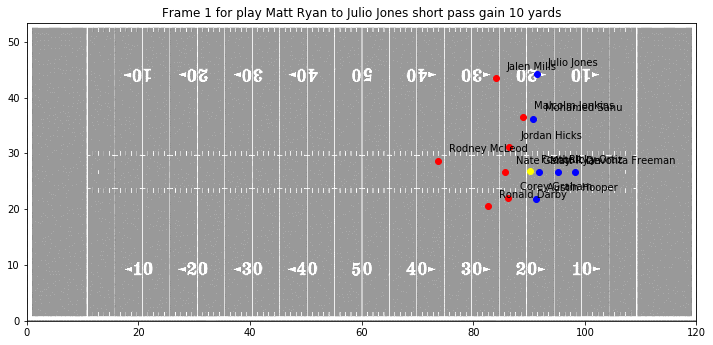

In [22]:
frame1 = track_play1[track_play1['frameId']==1]
fig,ax = plt.subplots(figsize=(12,10))
img = plt.imread('football_field_grayscale.png')
#x,y = frame1['x'],frame1['y']
#label = frame1['team']
color = {'home':'red','away':'blue','football':'yellow'}
ax.imshow(img,extent=[0,120,0,53.34])
ax.set_title('Frame 1 for play Matt Ryan to Julio Jones short pass gain 10 yards')
for x,y,l,n in zip(frame1['x'],frame1['y'],frame1['team'],frame1['displayName']):
    ax.scatter(x,y,c=color[l])
    ax.text(x+2.0,y+1.5,s=1,text=n)

In [23]:
def plot_frame(f):
    frame = track_play1[track_play1['frameId']==f]
    fig,ax = plt.subplots(figsize=(12,10))
    img = plt.imread('football_field_grayscale.png')
    color = {'home':'red','away':'blue','football':'yellow'}
    ax.imshow(img,extent=[0,120,0,53.34])
    ax.set_title(f'Frame {f} for play Matt Ryan to Julio Jones short pass gain 10 yards')
    for x,y,l in zip(frame['x'],frame['y'],frame['team']):
        ax.scatter(x,y,c=color[l])
        
    return fig

In [24]:
list_frames = []
for i in range(max(track_play1['frameId'])):
    list_frames.append(plot_frame(i))
    plt.close()

In [25]:
len(list_frames)

59

In [26]:
julio_play1 = track_play1[track_play1['displayName']=='Julio Jones']
jalen_play1 = track_play1[track_play1['displayName']=='Jalen Mills']
malcolm_play1 = track_play1[track_play1['displayName']=='Malcolm Jenkins']
sanu_play1 = track_play1[track_play1['displayName']=='Mohamed Sanu']
rodney_play1 = track_play1[track_play1['displayName']=='Rodney McLeod']
hicks_play1 = track_play1[track_play1['displayName']=='Jordan Hicks']

In [27]:
hicks_play1['x'].iloc[0]

86.48

Text(91.28, 36.65, 'Sanu')

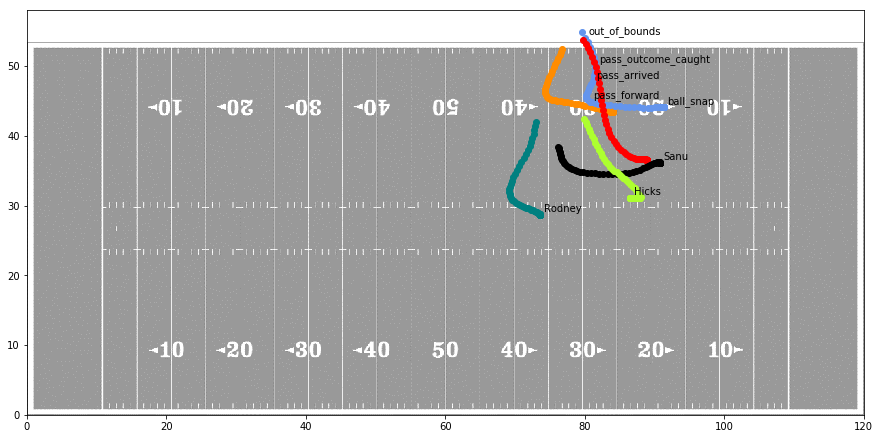

In [28]:
jfig,jax = plt.subplots(figsize=(15,10))
img = plt.imread('football_field_grayscale.png')
jax.imshow(img,extent=[0,120,0,53.34])

for ox,oy,d1x,d1y,d2x,d2y,d3x,d3y,d4x,d4y,d5x,d5y,event in zip(julio_play1['x'],julio_play1['y'],jalen_play1['x'],jalen_play1['y'],malcolm_play1['x'],malcolm_play1['y'],sanu_play1['x'],sanu_play1['y'],rodney_play1['x'],rodney_play1['y'],hicks_play1['x'],hicks_play1['y'],julio_play1['event']):
    jax.scatter(ox,oy,color='cornflowerblue')#julio jones
    jax.scatter(d1x,d1y,color='darkorange')#jalen mills
    jax.scatter(d2x,d2y,color='red')#malcolm jenkins
    jax.scatter(d3x,d3y,color='black')#mohamed sanu
    jax.scatter(d4x,d4y,color='teal')#rodney mcleod
    jax.scatter(d5x,d5y,color='greenyellow')#jordan hicks
    if(event!='None'):
        jax.text(ox+0.5,oy+0.5,s=0.1,text=event)

jax.text(hicks_play1['x'].iloc[0]+0.5,hicks_play1['y'].iloc[0]+0.5,s=0.1,text='Hicks')
jax.text(rodney_play1['x'].iloc[0]+0.5,rodney_play1['y'].iloc[0]+0.5,s=0.1,text='Rodney')
jax.text(sanu_play1['x'].iloc[0]+0.5,sanu_play1['y'].iloc[0]+0.5,s=0.1,text='Sanu')

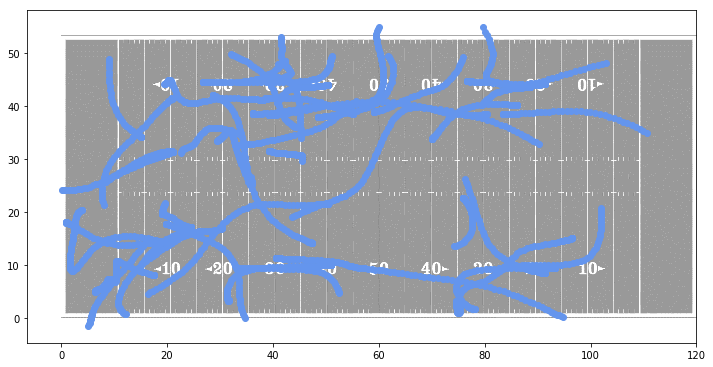

In [29]:
julio_full = week1[week1['displayName']=='Julio Jones']
jfig2,jax2 = plt.subplots(figsize=(12,10))
img = plt.imread('football_field_grayscale.png')
jax2.imshow(img,extent=[0,120,0,53.34])

for x,y in zip(julio_full['x'],julio_full['y']):
    jax2.scatter(x,y,color='cornflowerblue')

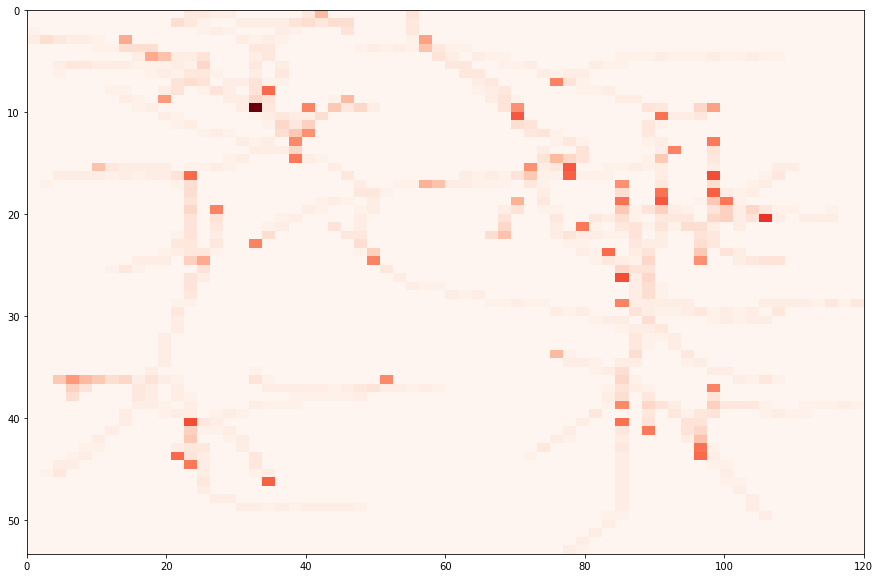

In [30]:
jheat,jax_heat = plt.subplots(figsize=(15,10))
heat = np.histogram2d(julio_full['x'],julio_full['y'],bins=64)
jax_heat.imshow(img,extent=[0,120,53.34,0])
pos = jax_heat.imshow(heat[0],extent=[0,120,53.34,0],aspect='auto',cmap=plt.cm.Reds)


In [31]:
track_2018 = pd.read_csv('data/all_tracking.csv')

In [32]:
julio_2018 = track_2018[track_2018['displayName']=='Julio Jones'].reset_index(drop=True)

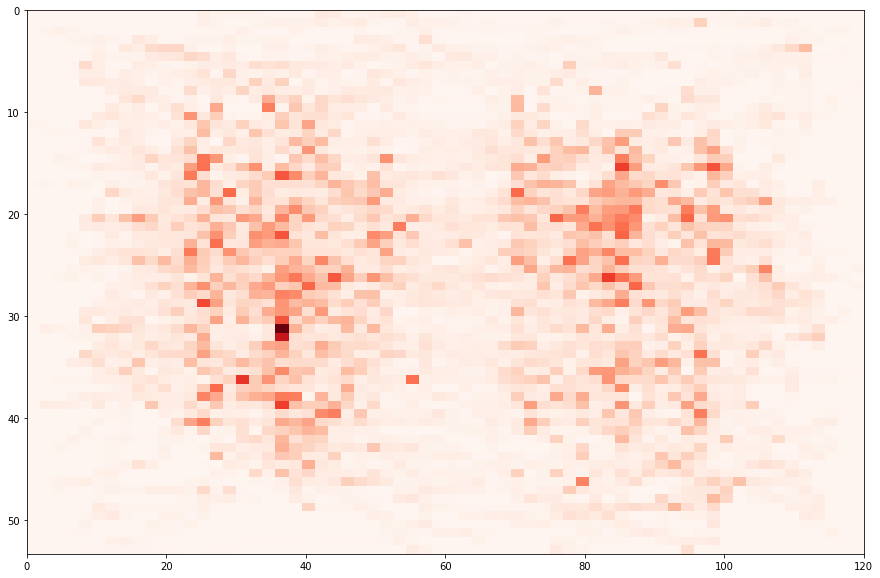

In [33]:
heat_2018 = np.histogram2d(julio_2018['x'],julio_2018['y'],bins=64)
jheat_2018,jax_heat_2018 = plt.subplots(figsize=(15,10))
jax_heat_2018.imshow(img,extent=[0,120,53.34,0])
jax_heat_2018.imshow(heat_2018[0],extent=[0,120,53.34,0],aspect='auto',cmap=plt.cm.Reds)

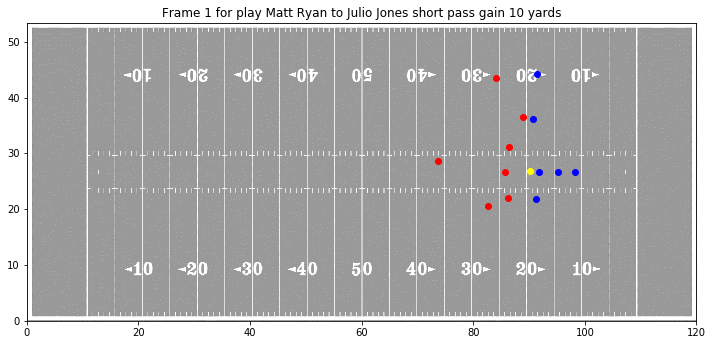

In [34]:
list_frames[1]

In [40]:
track_play1_home = [track_play1[track_play1['team']=='home'] ]
track_play1_away = track_play1[track_play1['team']=='away']
track_play1_football = track_play1[track_play1['team']=='football']

In [ ]:
fig,ax = mviz.plot_pitch()
d, = ax.plot(literal_eval(tracking_home.iloc[0]['home_players_x_coord']), literal_eval(tracking_home.iloc[0]['home_players_y_coord']), 'bo')
e, = ax.plot(literal_eval(tracking_away.iloc[0]['away_players_x_coord']), literal_eval(tracking_away.iloc[0]['away_players_y_coord']), 'wo')
f, = ax.plot(tracking_home.iloc[0]['ball_x'], tracking_home.iloc[0]['ball_y'], 'ro')
time = ax.text(30, 34.5,"Hello", fontsize=15)
score = ax.text(-36, 34.5, "Blue 0 - 0 White", fontsize=15) 
commentary = ax.text(-9, -36.5, "Commentary", fontsize=10)
def animate(i):
    d.set_data(literal_eval(tracking_home.iloc[i]['home_players_x_coord']), literal_eval(tracking_home.iloc[i]['home_players_y_coord']))
    e.set_data(literal_eval(tracking_away.iloc[i]['away_players_x_coord']), literal_eval(tracking_away.iloc[i]['away_players_y_coord']))
    f.set_data(tracking_home.iloc[i]['ball_x'], tracking_home.iloc[i]['ball_y'])
    time.set_text("{0:0=2d}".format(floor(tracking_home.iloc[i]['Time [s]']/60)) + ":" + "{0:0=2d}".format(floor(tracking_home.iloc[i]['Time [s]']%60)))
    try:
        x = events_df[events_df['Start Frame']==i].index.values[0]
        commentary.set_text("{}".format(events_df.iloc[x]['From']) + " " + "{}".format(events_df.iloc[x]['Subtype']) + " " + "{}".format(events_df.iloc[x]['To']))
    except:
        pass
    score.set_text("Blue {0} - {1} White".format(tracking_home.iloc[i]['home_score'], tracking_home.iloc[i]['away_score']))
    return d, e, f,

animationhi = animation.FuncAnimation(fig, animate, frames = range(11641, 13801), interval = 40)
plt.show()

Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/pandas/core/indexes/base.py", line 2656, in get_loc
    return self._engine.get_loc(key)
  File "pandas/_libs/index.pyx", line 108, in pandas._libs.index.IndexEngine.get_loc
  File "pandas/_libs/index.pyx", line 132, in pandas._libs.index.IndexEngine.get_loc
  File "pandas/_libs/hashtable_class_helper.pxi", line 1601, in pandas._libs.hashtable.PyObjectHashTable.get_item
  File "pandas/_libs/hashtable_class_helper.pxi", line 1608, in pandas._libs.hashtable.PyObjectHashTable.get_item
KeyError: 1

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/matplotlib/cbook/__init__.py", line 215, in process
    func(*args, **kwargs)
  File "/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/matplotlib/animation.py",

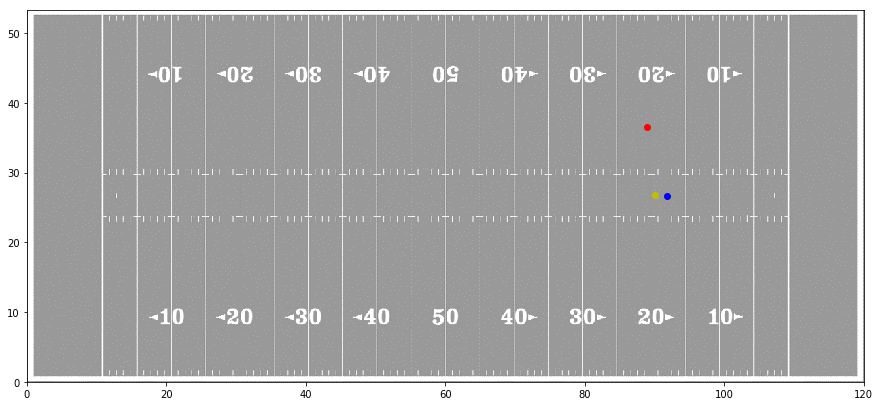

In [44]:
anim_fig,anim_ax = plt.subplots(figsize=(15,10))
img = plt.imread('football_field_grayscale.png')
anim_ax.imshow(img,extent=[0,120,0,53.34])

for f in track_play1['frames']:
    print(f)

h, = anim_ax.plot(track_play1_home.iloc[0]['x'],track_play1_home.iloc[0]['y'],'ro')
a, = anim_ax.plot(track_play1_away.iloc[0]['x'],track_play1_away.iloc[0]['y'],'bo')
f, = anim_ax.plot(track_play1_football.iloc[0]['x'],track_play1_football.iloc[0]['y'],'yo')

def animate(i):
    h.set_data(track_play1_home.iloc[i]['x'],track_play1_home[i]['y'],'ro')
    a.set_data(track_play1_away.iloc[i]['x'],track_play1_away[i]['y'],'bo')
    f.set_data(track_play1_football.iloc[i]['x'],track_play1_football[i]['y'],'yo')
    
    return h,a,f,
animation_gif = animation.FuncAnimation(anim_fig,animate,frames=range(1,827))
plt.show()

In [71]:
track_play1_home

,time,x,y,s,a,dis,o,dir,event,nflId,displayName,jerseyNumber,position,frameId,team,gameId,playId,playDirection,route
1,01:07:14.599Z,88.89,36.47,0.01,0.01,0.01,105.63,66.66,None,79848.0,Malcolm Jenkins,27.0,SS,1,home,2018090600,75,left,NaN
3,01:07:14.599Z,86.31,22.01,0.09,0.42,0.01,70.12,168.91,None,2495613.0,Corey Graham,24.0,FS,1,home,2018090600,75,left,NaN
5,01:07:14.599Z,73.64,28.70,0.03,0.02,0.01,103.05,219.41,None,2534832.0,Rodney McLeod,23.0,FS,1,home,2018090600,75,left,NaN
7,01:07:14.599Z,86.48,31.12,0.09,0.03,0.04,95.90,33.36,None,2552315.0,Jordan Hicks,58.0,MLB,1,home,2018090600,75,left,NaN
8,01:07:14.599Z,82.67,20.53,0.03,0.07,0.01,81.14,174.57,None,2552689.0,Ronald Darby,21.0,CB,1,home,2018090600,75,left,NaN
9,01:07:14.599Z,84.00,43.49,0.14,0.05,0.01,108.23,110.32,None,2555383.0,Jalen Mills,31.0,CB,1,home,2018090600,75,left,NaN
11,01:07:14.599Z,85.63,26.59,0.03,0.04,0.02,87.69,38.80,None,2558175.0,Nate Gerry,47.0,LB,1,home,2018090600,75,left,NaN
15,01:07:14.700Z,88.89,36.47,0.01,0.01,0.00,105.63,68.49,None,79848.0,Malcolm Jenkins,27.0,SS,2,home,2018090600,75,left,NaN
17,01:07:14.700Z,86.32,22.00,0.10,0.58,0.01,70.88,119.04,None,2495613.0,Corey Graham,24.0,FS,2,home,2018090600,75,left,NaN
19,01:07:14.700Z,73.64,28.70,0.03,0.02,0.01,104.57,228.17,None,2534832.0,Rodney McLeod,23.0,FS,2,home,2018090600,75,left,NaN


In [75]:
def get_coord(play):
    c_x = {}
    c_y = {}
    for f in set(play['frameId']):
        c_x[f] = [x for x,x_f in zip(play['x'],play['frameId']) if x_f==f]
        c_y[f] = [y for y,y_f in zip(play['y'],play['frameId']) if y_f==f]
        
    return c_x,c_y

In [79]:
home_coord = {}
away_coord = {}
football_coord = {}
home_coord['h_x'],home_coord['h_y'] = get_coord(track_play1_home)
away_coord['h_x'],away_coord['h_y'] = get_coord(track_play1_home)
football_coord['h_x'],football_coord['h_y'] = get_coord(track_play1_football)

In [81]:
home_play1_coord = pd.DataFrame(home_coord)
away_play1_coord = pd.DataFrame(away_coord)